Ahmad Sholihin
asholeeqeen41@gmail.com

In [15]:
# Impor library yang diperlukan
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dropout, Dense
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('news_categorical.csv')
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [20]:
# Untuk menampilkan jumlah colomns dan data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [30]:
# Menampilkan jumlah per kategori
print("1. Sport\t\t", len(df[df.category == 'sport'])) 
print("2. Business\t\t", len(df[df.category == 'business']))
print("3. Politics\t\t", len(df[df.category == 'politics']))
print("4. Tech\t\t\t", len(df[df.category == 'tech'])) 
print("5. Entertainment\t", len(df[df.category == 'entertainment'])) 

1. Sport		 511
2. Business		 510
3. Politics		 417
4. Tech			 401
5. Entertainment	 386


In [22]:
#drop category and split category
kategori_berita = pd.get_dummies(df.category)
dataset_baru = pd.concat([df, kategori_berita], axis=1)
dataset_baru = dataset_baru.drop(columns='category')
dataset_baru

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [23]:
#preparing text and label
teks = dataset_baru['text'].values
label = dataset_baru[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [24]:
# Kemudian bagi data untuk training dan data untuk testing
from sklearn.model_selection import train_test_split
teks_latih, teks_test, label_latih, label_test = train_test_split(teks, label, test_size=0.2)

In [25]:
#create tokenizer and padding
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(teks_latih) 
tokenizer.fit_on_texts(teks_test)
word_index = tokenizer.word_index
sekuens_latih = tokenizer.texts_to_sequences(teks_latih)
sekuens_test = tokenizer.texts_to_sequences(teks_test)
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [26]:
#Callback to avoid overfitting
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah lebih dari 95%!")
      self.model.stop_training = True
callbacks = myCallback()

In [27]:
#create model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



In [28]:
plot_model = model.fit(padded_latih, label_latih, epochs=30, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
56/56 - 227s - loss: 1.5948 - accuracy: 0.2466 - val_loss: 1.5368 - val_accuracy: 0.3910
Epoch 2/30
56/56 - 224s - loss: 1.2964 - accuracy: 0.4702 - val_loss: 1.0800 - val_accuracy: 0.5079
Epoch 3/30
56/56 - 224s - loss: 0.7222 - accuracy: 0.7371 - val_loss: 0.7718 - val_accuracy: 0.7011
Epoch 4/30
56/56 - 223s - loss: 0.2585 - accuracy: 0.9096 - val_loss: 0.4679 - val_accuracy: 0.8629
Epoch 5/30
56/56 - 224s - loss: 0.0594 - accuracy: 0.9831 - val_loss: 0.5159 - val_accuracy: 0.8562

Akurasi telah lebih dari 95%!


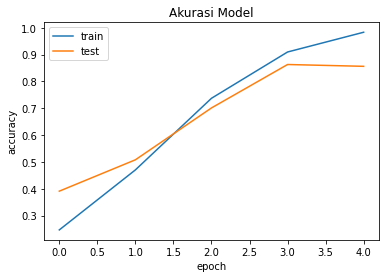

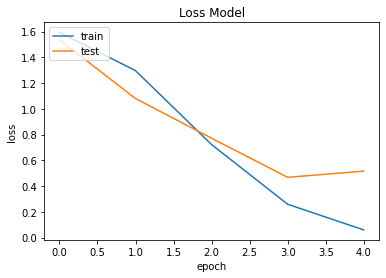

In [31]:
import matplotlib.pyplot as plt

#Accuracy  
plt.plot(plot_model.history['accuracy'])
plt.plot(plot_model.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#Loss
plt.plot(plot_model.history['loss'])
plt.plot(plot_model.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()